In [1]:
from bs4 import BeautifulSoup #webscraping library
import requests #make http requests
import re #reg expressions

import numpy as np

In [2]:
def nopunc(string):
    punc_rem='''!()[]{};:'"\,<>.?@#$%^&*_~’'''
    punc_hyph='/' #songs with / in the title such as Weird Fishes/Arpeggi do not have the / removed but replaced by a hyphen
    for char in punc_rem:
        string=string.replace(char,'')
    for char in punc_hyph:
        string=string.replace(char,'-')
    return string

In [3]:
def generate_genius_url(artist,song):
    base_url='https://genius.com'
    artist=nopunc(artist)
    artist_hyphenated='-'.join(artist.split())
    song=nopunc(song)
    song_hyphenated='-'.join(song.split())
    ending='lyrics'
    url=base_url + '/' +'-'.join([artist_hyphenated,song_hyphenated,ending])
    return url

In [4]:
def multiline_verse_marker_removal(text):
    txt_array=text.splitlines()
    ind=[]
    i=True
    for line in txt_array:
        if line[0]=='[':
            i=False
        ind.append(i)
        if line[-1]==']':
            i=True
    result='\n'.join(np.array(txt_array)[ind])
    return result

In [5]:
def get_lyrics(artist, song,remove_verse_markers=True,print_=False):
    url=generate_genius_url(artist,song)
    soup=BeautifulSoup(requests.get(url).text,'html.parser')
    Genius_error_text='Oops! Page not found'
    if soup.get_text().find(Genius_error_text)>0:
        return None
    else:
        Genius_class_val='Lyrics__Container-sc-1ynbvzw-5 Dzxov' #from inspeciton. If code breaks in future, check here
        lyrics=soup.find_all('div', class_=Genius_class_val)
        lyrics_all="\n".join([section.get_text("\n") for section in lyrics])
        if remove_verse_markers:
            #lyrics_all=re.sub('\n?\[.*\]\n?','',lyrics_all)
            lyrics_all=multiline_verse_marker_removal(lyrics_all)
        if print_:
            print(lyrics_all)
        return lyrics_all

In [6]:
print(get_lyrics('Metallica','Nothing Else Matters'))

So close, no matter how far
Couldn't be much more from the heart
Forever trusting who we are
And nothing else matters
Never opened myself this way
Life is ours, we live it our way
All these words, I don't just say
And nothing else matters
Trust I seek and I find in you
Every day for us something new
Open mind for a different view
And nothing else matters
Never cared for what they do
Never cared for what they know
But I know
So close, no matter how far
It couldn't be much more from the heart
Forever trusting who we are
And nothing else matters
Never cared for what they do
Never cared for what they know
But I know
I never opened myself this way
Life is ours, we live it our way
All these words, I don't just say
And nothing else matters
Trust I seek and I find in you
Every day for us something new
Open mind for a different view
And nothing else matters
Never cared for what they say
Never cared for games they play
Never cared for what they do
Never cared for what they know
And I know, yeah,

In [7]:
print(get_lyrics('Kendrick Lamar','Humble'))

Nobody pray for me
It been that day for me
Way (Yeah, yeah)
Ayy, I remember syrup sandwiches and crime allowances
Finesse a nigga with some counterfeits, but now I'm countin’ this
Parmesan where my accountant lives, in fact, I'm downin' this
D’USSÉ with my boo bae, tastes like Kool-Aid for the analysts
Girl, I can buy your ass the world with my paystub
Ooh, that pussy good, won't you sit it on my taste bloods?
I get way too petty once you let me do the extras
Pull up on your block, then break it down: we playin' Tetris
AM to the PM, PM to the AM, funk
Piss out your per diem, you just gotta hate 'em, funk
If I quit your BM, I still ride Mercedes, funk
If I quit this season, I still be the greatest, funk
My left stroke just went viral
Right stroke put lil' baby in a spiral
Soprano C, we like to keep it on a high note
It's levels to it, you and I know
Bitch, be humble (Hol' up, bitch)
Sit down (Hol' up, lil’, hol’ up, lil' bitch)
Be humble (Hol’ up, bitch)
Sit down (Hol' up, sit down, lil

In [8]:
print(get_lyrics('Frank Sinatra','The Girl From Ipanema'))

Tall and tan and young and lovely
The girl from Ipanema goes walking
And when she passes
Each one she passes goes "ah"
When she walks, she's like a samba
That swings so cool and sways so gentle
That when she passes
Each one she passes goes
 
 "ooh"
But I watch her so sadly
How can I tell her I love her
Yes, I would give my heart gladly
But each day, when she walks to the sea
She looks straight ahead, not at me
Tall and tan and young and lovely
The girl from Ipanema goes walking
And when she passes
I smile but she doesn't see, doesn't see
Olha que coisa mais linda mais cheia de graça
Ela menina que vem e que passa
Num doce balanço a caminho do mar
Moça do corpo dourado do sol de Ipanema
O seu balançado parece um poema
É a coisa mais linda que eu já vi passar..
Ooh, but I watch her so sadly
Ah, porque tudo é tão triste
Yes, I would give my heart gladly
But each day, when she walks to the sea
She looks straight ahead, not at me
Tall, tan, young, lovely
The girl from Ipanema goes walking
A

In [12]:
print(get_lyrics('Aqua','Barbie Girl'))

Hiya, 
Barbie
Hi, Ken
You wanna go for a ride?
Sure, Ken
Jump in
I'm a Barbie girl in the Barbie world
Life in plastic, it's fantastic
You can brush my hair, undress me everywhere
Imagination, life is your creation
Come on, Barbie, let's go party
I'm a Barbie girl in the Barbie world
Life in plastic, it's fantastic
You can brush my hair, undress me everywhere
Imagination, life is your creation
I'm a blonde bimbo girl in a fantasy world
Dress me up, make it tight, I'm your dolly
You're my doll, rock and roll, feel the glamor in pink
Kiss me here, touch me there, hanky-panky
You can touch, you can play
If you say I'm always yours, ooh woah
I'm a Barbie girl in the Barbie world
Life in plastic, it's fantastic
You can brush my hair, undress me everywhere
Imagination, life is your creation
Come on, Barbie, let's go party
Ah, ah, ah, yeah
Come on, Barbie, let's go party
Ooh woah, ooh woah
Come on, Barbie, let's go party
Ah, ah, ah, yeah
Come on, Barbie, let's go party
Ooh woah, ooh woah
Make

In [13]:
def generate_genius_artist_url(artist):
    base_url='https://genius.com/artists'
    artist=nopunc(artist)
    artist_hyphenated='-'.join(artist.split())
    ending='songs'
    url='/'.join([base_url,artist_hyphenated,ending])
    return url

In [14]:
def remove_strange_characters(arr,charlist):
    for i in range(len(arr)):
        for char in charlist:
            arr[i]=arr[i].replace(char,'')
    return arr

In [15]:
def get_songs_list(artist):
    url=generate_genius_artist_url(artist)
    soup=BeautifulSoup(requests.get(url).text,'html.parser')
    Genius_class_val='ListItem__InfoContainer-sc-122yj9e-3 jGMTGz'
    songs=soup.find_all('div',class_=Genius_class_val)
    sep='&&&VIEWS&&&' #resulting song also includes views. We define this separator to only take the song title
    songs_all=[song.get_text(sep)[:song.get_text(sep).find(sep)] for song in songs]
    #An invisible \u200b character was causing some issues. Add similar characters to this list for removal
    
    remove_char_list=['\u200b']
    songs_all=remove_strange_characters(songs_all,remove_char_list)
    #for i in range(len(songs_all)):
    #    for char in remove_char_list:
    #        songs_all[i]=songs_all[i].replace(char,'')
    return songs_all

<strong>Infinite Scroll issue</strong>

A relatively large limitation of this method is that the Genius artist page uses infinite scrolling. Therefore the current functionality only returns the first songs listed on the page before scrolling. Below is my first attempt at fixing this, which is not yet working. The basic idea is to install a webdriver to automatically scroll the page a few times. At the moment, the page scrolls too far to trigger the infinite scrolling.

In [348]:
from selenium import webdriver 
from selenium.webdriver.chrome.service import Service as ChromeService 

In [349]:
from webdriver_manager.chrome import ChromeDriverManager

In [350]:
driver = webdriver.Chrome(service=ChromeService( 
	ChromeDriverManager().install()))

PermissionError: [WinError 5] Zugriff verweigert: 'C:\\Users\\CarlWhelan\\.wdm\\drivers\\chromedriver\\win64\\116.0.5845.110\\chromedriver-win32\\chromedriver.exe' -> 'C:\\Users\\CarlWhelan\\.wdm\\drivers\\chromedriver\\win64\\116.0.5845.110\\chromedriver.exe'

In [351]:
driver.get(test_url)

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=116.0.5845.110)
Stacktrace:
	GetHandleVerifier [0x005337C3+48947]
	(No symbol) [0x004C8551]
	(No symbol) [0x003CC92D]
	(No symbol) [0x003B36E5]
	(No symbol) [0x00418CDB]
	(No symbol) [0x00427113]
	(No symbol) [0x00414E86]
	(No symbol) [0x003F16C7]
	(No symbol) [0x003F284D]
	GetHandleVerifier [0x0077FDF9+2458985]
	GetHandleVerifier [0x007C744F+2751423]
	GetHandleVerifier [0x007C1361+2726609]
	GetHandleVerifier [0x005B0680+560624]
	(No symbol) [0x004D238C]
	(No symbol) [0x004CE268]
	(No symbol) [0x004CE392]
	(No symbol) [0x004C10B7]
	BaseThreadInitThunk [0x764300C9+25]
	RtlGetAppContainerNamedObjectPath [0x77C07B1E+286]
	RtlGetAppContainerNamedObjectPath [0x77C07AEE+238]


In [352]:
import time
from datetime import datetime

In [353]:
for i in range(10):
    driver.execute_script('window.scrollTo(0, 0.9 * document.body.scrollHeight);') 
    time.sleep(0.5)

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=116.0.5845.110)
Stacktrace:
	GetHandleVerifier [0x005337C3+48947]
	(No symbol) [0x004C8551]
	(No symbol) [0x003CC92D]
	(No symbol) [0x003B36E5]
	(No symbol) [0x00418CDB]
	(No symbol) [0x00427113]
	(No symbol) [0x00414E86]
	(No symbol) [0x003F16C7]
	(No symbol) [0x003F284D]
	GetHandleVerifier [0x0077FDF9+2458985]
	GetHandleVerifier [0x007C744F+2751423]
	GetHandleVerifier [0x007C1361+2726609]
	GetHandleVerifier [0x005B0680+560624]
	(No symbol) [0x004D238C]
	(No symbol) [0x004CE268]
	(No symbol) [0x004CE392]
	(No symbol) [0x004C10B7]
	BaseThreadInitThunk [0x764300C9+25]
	RtlGetAppContainerNamedObjectPath [0x77C07B1E+286]
	RtlGetAppContainerNamedObjectPath [0x77C07AEE+238]


In [354]:
soup=BeautifulSoup(driver.page_source,'html.parser')

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=116.0.5845.110)
Stacktrace:
	GetHandleVerifier [0x005337C3+48947]
	(No symbol) [0x004C8551]
	(No symbol) [0x003CC92D]
	(No symbol) [0x003B36E5]
	(No symbol) [0x00418CDB]
	(No symbol) [0x00427113]
	(No symbol) [0x00414E86]
	(No symbol) [0x003F16C7]
	(No symbol) [0x003F284D]
	GetHandleVerifier [0x0077FDF9+2458985]
	GetHandleVerifier [0x007C744F+2751423]
	GetHandleVerifier [0x007C1361+2726609]
	GetHandleVerifier [0x005B0680+560624]
	(No symbol) [0x004D238C]
	(No symbol) [0x004CE268]
	(No symbol) [0x004CE392]
	(No symbol) [0x004C10B7]
	BaseThreadInitThunk [0x764300C9+25]
	RtlGetAppContainerNamedObjectPath [0x77C07B1E+286]
	RtlGetAppContainerNamedObjectPath [0x77C07AEE+238]


In [356]:
driver = webdriver.Chrome(service=ChromeService( 
	ChromeDriverManager().install())) 
time.sleep(10)

driver.get(test_url)

for i in range(10):
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);') #scrolling too far right now
    time.sleep(0.5)
    
soup=BeautifulSoup(driver.page_source,'html.parser')
songs=soup.find_all('div',class_="ListItem__InfoContainer-sc-122yj9e-3 jGMTGz")
sep='&&&VIEWS&&&'
songs_all='\n'.join([song.get_text(sep)[:song.get_text(sep).find(sep)] for song in songs])

PermissionError: [WinError 5] Zugriff verweigert: 'C:\\Users\\CarlWhelan\\.wdm\\drivers\\chromedriver\\win64\\116.0.5845.110\\chromedriver-win32\\chromedriver.exe' -> 'C:\\Users\\CarlWhelan\\.wdm\\drivers\\chromedriver\\win64\\116.0.5845.110\\chromedriver.exe'

<strong>Back to the real stuff</strong>

In [16]:
url='https://kworb.net/spotify/artists.html'
soup=BeautifulSoup(requests.get(url).text,'html.parser')
artists=[artist.get_text() for artist in soup.find_all('td', class_='text')]

In [17]:
import pandas as pd

In [18]:
df=[]

num_artists=100
num_songs_per_artist=10
for artist in artists[:num_artists]:
    songs=get_songs_list(artist)[:num_songs_per_artist]
    for song in songs:
        lyrics=get_lyrics(artist,song)
        if lyrics is not None:
            df_entry={'Song':song,'Artist':artist,'Lyrics':lyrics}
            df.append(df_entry)
df=pd.DataFrame(df)

In [19]:
df

,Song,Artist,Lyrics
0,God’s Plan,Drake,And they wishin' and wishin'\nAnd wishin' and ...
1,In My Feelings,Drake,"Trap, TrapMoneyBenny\nThis shit got me in my f..."
2,Hotline Bling,Drake,"You used to call me on my\nYou used to, you us..."
3,One Dance,Drake,"Baby, I like your style\nGrips on your waist, ..."
4,"Hold On, We’re Going Home",Drake,I got my eyes on you\nYou're everything that I...
...,...,...,...
588,Attention,Charlie Puth,"Woah-oh, hm-hmm\nYou've been runnin' 'round, r..."
589,We Don’t Talk Anymore,Charlie Puth,"We don't talk anymore, we don't talk anymore\n..."
590,How Long,Charlie Puth,"Alright\nWhoa, oh, yeah\nI'll admit, I was wro..."
591,Marvin Gaye,Charlie Puth,Let's Marvin Gaye and get it on\nYou got the h...


In [20]:
df.describe()

,Song,Artist,Lyrics
count,593,593,593
unique,581,95,592
top,See You Again,Adele,"In your eyes, there's a heavy blue\nOne to lov..."
freq,3,10,2


<Axes: >

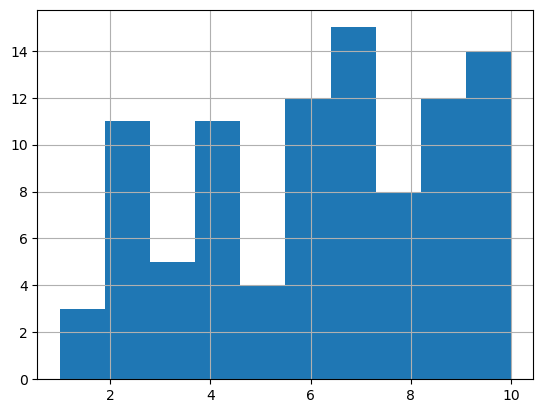

In [21]:
pd.set_option('display.max_rows', 100)

df.groupby('Artist').count()['Song'].hist(bins=10)

In [22]:
def build_lyrics_dataset(artists, songs_per_artist):
    df=[]
    for artist in artists:
        songs=get_songs_list(artist)[:songs_per_artist]
        for song in songs:
            lyrics=get_lyrics(artist,song)
            if lyrics is not None:
                df_entry={'Song':song,'Artist':artist,'Lyrics':lyrics}
                df.append(df_entry)
    df=pd.DataFrame(df)
    return df

In [23]:
artists=['Nick Cave and the Bad Seeds','Sharon van Etten','Arctic Monkeys','Radiohead','Le Tigre']
df_2=build_lyrics_dataset(artists,10)

In [24]:
df_2

,Song,Artist,Lyrics
0,Red Right Hand,Nick Cave and the Bad Seeds,Take a little walk to the edge of town and go ...
1,O Children,Nick Cave and the Bad Seeds,"Pass me that lovely little gun\nMy dear, my da..."
2,Into My Arms,Nick Cave and the Bad Seeds,I don't believe in an interventionist god\nBut...
3,Henry Lee,Nick Cave and the Bad Seeds,"Get down, get down, little Henry Lee\nAnd stay..."
4,Where the Wild Roses Grow,Nick Cave and the Bad Seeds,They call me The Wild Rose\nBut my name was El...
5,Jesus Alone,Nick Cave and the Bad Seeds,You fell from the sky\nCrash landed in a field...
6,I Need You,Nick Cave and the Bad Seeds,"When you're feeling like a lover, nothing real..."
7,The Mercy Seat,Nick Cave and the Bad Seeds,It began when they come took me from my home\n...
8,Skeleton Tree,Nick Cave and the Bad Seeds,"Sunday morning, skeleton tree\nWell, nothing i..."
9,Rings of Saturn,Nick Cave and the Bad Seeds,Upside down and inside out and on all eights\n...


In [25]:
df_2.groupby('Artist').count()

,Song,Lyrics
Artist,,
Arctic Monkeys,10,10
Le Tigre,10,10
Nick Cave and the Bad Seeds,10,10
Radiohead,10,10
Sharon van Etten,2,2


In [26]:
from pandasql import sqldf

In [29]:
query="""SELECT * FROM df UNION SELECT * FROM df_2"""
lyrics_df=sqldf(query)

In [30]:
lyrics_df.to_csv("lyrics.csv")